# **Effective Model**

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC, Change_Basis

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]

## **Channel Decomposition** 

We decompose the averaged induced pairing $\overline{\Delta}_{ind} (z)$ over a basis of 16 matrices that generates the whole space made by the outer product of spin $\sigma = \uparrow, \downarrow$ and orbital $\lambda=\pm$.
The $4 \times 4$ matrix can be decomposed as
$$
    \overline{\Delta}_{ind} (z) = \sum_A f_A (z) \Lambda_A \,,
$$
where the coefficients of the expansion can be computed through
$$
    f_A (z) = 
    \frac{ \text{Tr}\left( \Lambda_A^\dagger \, \Delta_{ind} (z)  \right) }
    { \text{Tr}\left( \Lambda_A^\dagger \, \Lambda_A  \right) }
$$and $\{ \Lambda_A \}$ is a basis of 16 matrices that generates the whole space.


For the sake of simplicity, we choose as basis in spin and orbital spaces the set of Pauli matrices 
$$
    S_a = 
    \left\{ 
    \sigma_0, \sigma_x, \sigma_y, \sigma_z 
    \right\} \,,
    \qquad
    T_a = 
    \left\{ 
    \tau_0, \tau_x, \tau_y, \tau_z 
    \right\} \,,   
$$
so that the full set of matrices $\{ \Lambda_A \}$ can be simply obtained as the outer product
$$
    \Lambda_A = \frac{1}{2} \left( S_a \otimes L_\alpha \right) \,,
$$
where the factor $\frac12$ is used to normalize the Hilbert-Schmidt inner product of the matrices $\Lambda_A$.
Here $a \in \{ \sigma_0, \sigma_x, \sigma_y, \sigma_z \}$ and $\alpha \in \{ \tau_0, \tau_x, \tau_y, \tau_z \}$ denote the matrices of the spin and orbital subspaces.

#### <font color='green'> **Render Channels** </font> 

In [2]:
from sympy import Matrix, Symbol
from Pairing_Effective_Model import Render_Projection, Render_Channel, Pairing_Projection, Pairing_Channel

# define your physical basis labels (spin x orbital)
basis = [r"\uparrow+", r"\uparrow-", r"\downarrow+", r"\downarrow-"]

# build a 4×4 Matrix of Symbols f_{α,β}
M = Matrix([[ Symbol(f"f_{{{i},{j}}}") for j in basis ] for i in basis ])

# spin and ordital indices
s = 'sx'; o = 't0'

# projection 
Render_Projection(M=M, spin=s, orbital=o)
# pairing channel
Render_Channel(spin=s, orbital=o)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### <font color='green'> **Projected Components** </font> 

In [3]:
# finite z-lattice
d = 100.; z = 25
# parameters
mu = 0.010; Delta = 0.005; L = 0.020; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# compute F at given parameters
F2 = Change_Basis(FMTI2_NeumannBC(d=d, z=z, Z=z, z0=0, kx=0.01, ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma))

s = 'sx'; o = 'ty'

proj = Pairing_Projection(Delta=F2, spin=s, orbital=o)
print(proj)
print()

# get the matrix corresponding to projection
c = Pairing_Channel(spin=s, orbital=o)
print(c)

(-7.660287804913127+0.3661379809027944j)

[[ 0. +0.j  0. +0.j  0. +0.j  0.5+0.j]
 [-0. +0.j  0. +0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j -0. +0.j  0. +0.j]]


### **Induced Pairing**

In [4]:
# shape of the matrix 
n = 4

# space dimensions
K = []; Z = []
k_dim = 100; z_dim = 100

# read file pairing
rows = np.loadtxt("Pairing/pairing_L-p20.txt")

# store data in matrices
F_data = np.empty((k_dim, z_dim, 4, 4), dtype='complex')


# loop over momenta
for idx in range(k_dim):
    
    # loop over space
    for jdx in range(z_dim):

        # index for rows
        irow = z_dim * idx + jdx
                
        # read one row
        row = rows[irow]
    
        if jdx == 0: K.append(float(row[0]))
    
        if idx == 0: Z.append(float(row[1]))
    
        # real part
        real = row[2 : 2 + n*n].reshape((n, n))
        # imaginary part
        imag = row[2 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_data[idx][jdx] = Change_Basis(matrix)


# take sum over k
Favg = np.sum(F_data, axis=0)
print(Favg.shape)

(100, 4, 4)


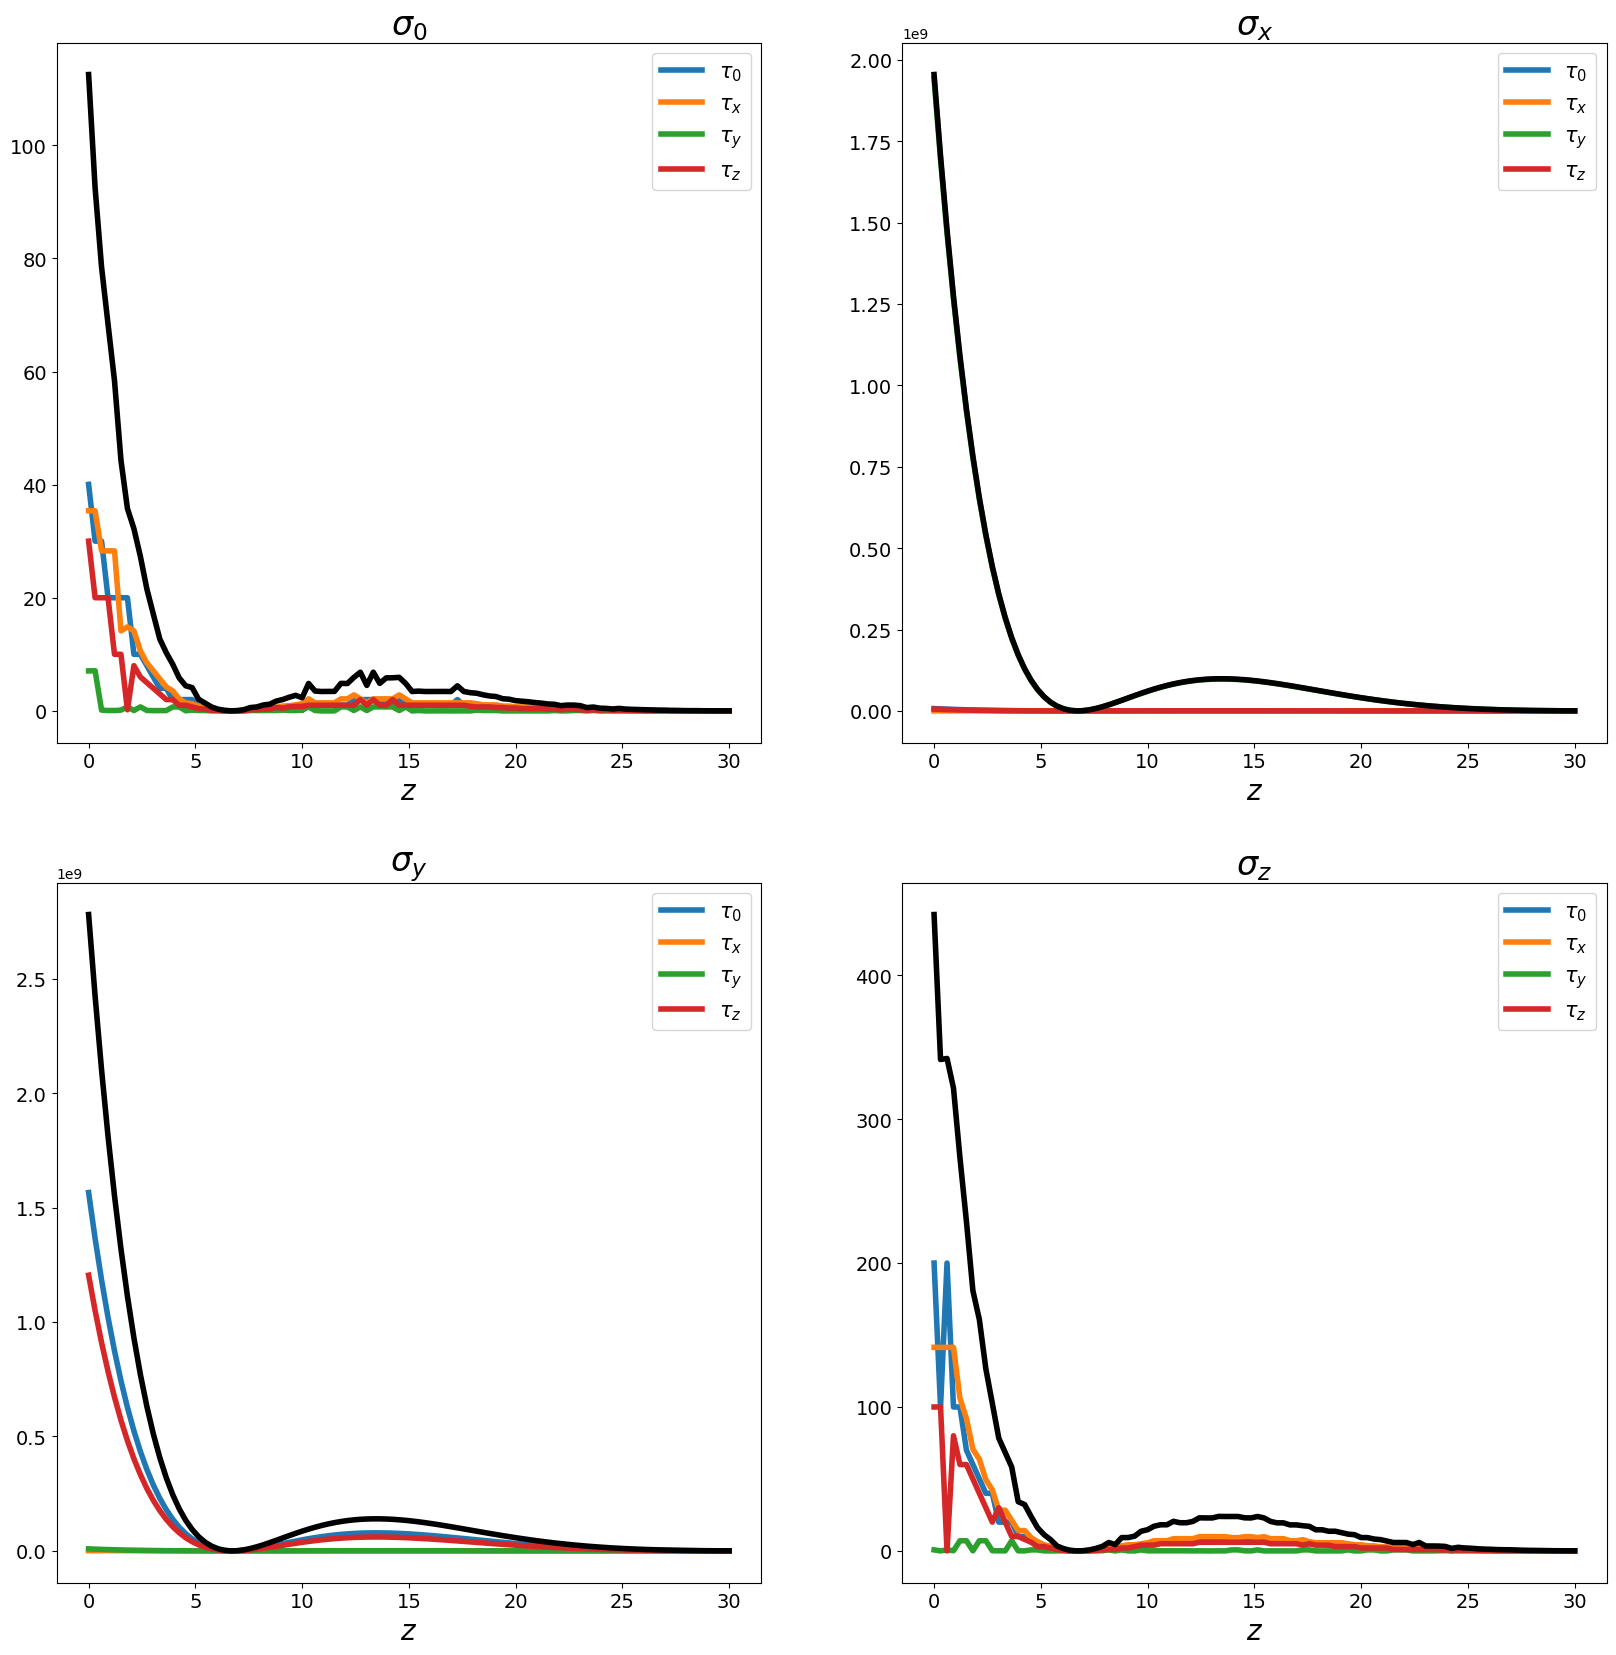

In [6]:
label = {
    's0': "$\sigma_0$",
    'sx': "$\sigma_x$",
    'sy': "$\sigma_y$",
    'sz': "$\sigma_z$",

    't0': "$\\tau_0$",
    'tx': "$\\tau_x$",
    'ty': "$\\tau_y$",
    'tz': "$\\tau_z$"
}


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))        

# loop over spins
for s in ['s0', 'sx', 'sy', 'sz']:

    # indices for plotting
    if s=='s0': iPic = 0; jPic = 0
    if s=='sx': iPic = 0; jPic = 1
    if s=='sy': iPic = 1; jPic = 0
    if s=='sz': iPic = 1; jPic = 1

    # zero vector for total
    ftotal = np.zeros(len(Z), dtype='complex')

    for t in ['t0', 'tx', 'ty', 'tz']:
        
        # projection over channel
        f_A = np.array([Pairing_Projection(Delta=F2, spin=s, orbital=t) for F2 in Favg])

        ftotal += np.abs(f_A)
        
        # plot coefficients f_A(z)
        axs[iPic][jPic].plot(Z, np.abs(f_A), lw=4, label=label[t])

    
    axs[iPic][jPic].plot(Z, ftotal.real, lw=4, c='black')
    
    axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    axs[iPic][jPic].set_title(label[s], fontsize = 24)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)